In [42]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler

import numpy as np
import scipy as sp #right=True.
from operator import itemgetter, attrgetter

In [43]:
def TriVP(Valp,Vectp):
    # trie dans l'ordre décroisant les valeurs propres
    # en cas de valeurs propres complexes on trie  selon leu module
    liste1 = Vectp.tolist()
    liste2 = Valp.tolist()
    norme = np.abs(Valp)
    liste3 = norme.tolist()

    result = zip(liste1, liste2,liste3)
    result_trie =sorted(result,key =itemgetter(2), reverse=True)
    liste1, liste2, liste3 =  zip(*result_trie)
    Vectp = np.asarray(liste1)
    Valp = np.asarray(liste2)
    
    return Valp,Vectp


In [44]:
def Kernel(XC,kernel='linear',gamma=0,degre=3):
    # Calcule de la matrice de Gram, sélection du noyau
    # valeurs par défaut : 
    # rbf :gamma = 1/n
    # polynomial : degre = 3,    c=1
    n = XC.shape[1]
    m = XC.shape[0]
    if kernel == 'linear':
        K = XC @ XC.T
    elif kernel == 'rbf':
        # valeur par défaut comme dans scikitlearn
        if gamma == 0:
            gamma = 1/n
            
        K = np.ones((m,m))
        for i in range(m):
            for j in range(i+1,m):
                K[i,j] = np.exp(-np.linalg.norm(XC[i,:]-XC[j,:])**2 * gamma)
                K[j,i] = K[i,j]
    elif kernel =='poly':
        PS = XC @ XC.T + np.ones((m,m))
        K = np.power(PS,degre)
        
    return K

In [45]:
def myACP(X):
    n = X.shape[1]
    m = X.shape[0]
    moy = np.sum(X,0)/m # axe de la matrice selon lequel on somme
    np.reshape(moy,(n,1))

    # données centrées
    XC = X - moy.T
    
    # covariance
    S = XC.T @ XC / m

    # calcule des valeurs propres et vecteurs propres
    # vecteurs propres de norme 1 rangés en colonnes
    Valp, Vectp = np.linalg.eig(S)

    # il faut ordonner dans l'ordre des valeurs propres décroissantes
    Valp,Vectp = TriVP(Valp,Vectp)

    # on projette sur les deux premiers axes principaux
    Projection = XC @ Vectp[:,:2]
    
    # on calcule la varience explique
    VarExp = Valp / np.sum(Valp)
    
    # on calcule la varience explique
    # print("Variance (MyACP):", Valp)
    # print("Variance expliquée (MyACP):", VarExp)
    # print("Directions Propres (MyACP):")
    # for i, vecteur in enumerate(Vectp.T):  # Chaque colonne est une direction propre
    #     print(f"Composante {i + 1}: {vecteur}")
    
    return Projection, VarExp, Vectp

In [46]:
def CountComp(Y, VarExp):
    
    countcomp = 0
    VarGarde = 0
    
    for i in VarExp:
        countcomp += 1
        VarGarde += i
        if VarGarde > 0.9:
            break
        
    print("Nombre de Composantes: ", countcomp)
    print("Variance Gardé: ", VarGarde)
    
    # Représentation graphique des variances expliquées
    fig, ax = plt.subplots(1, 2, figsize=(8, 3))

    # Scree plot (graphique des variances expliquées)
    ax[0].bar(range(1, len(VarExp) + 1), VarExp, alpha=0.7, align='center')
    ax[0].step(range(1, len(VarExp) + 1), np.cumsum(VarExp), where='mid', label='Variance cumulée')
    ax[0].set_title('Variance expliquée par composante principale')
    ax[0].set_xlabel('Composante principale')
    ax[0].set_ylabel('Proportion de variance expliquée')
    ax[0].legend()
    
    # Visualisation des données projetées
    ax[1].scatter(Y[:, 0], Y[:, 1], edgecolor='k')
    ax[1].set_xlabel('CP 1')
    ax[1].set_ylabel('CP 2')
    ax[1].set_title('Representation des deux premieres composantes')

    plt.tight_layout()
    plt.show()
    return countcomp, VarGarde
    


 ------ DIGIT =  0 -------------
Nombre de Composantes:  18
Variance Gardé:  0.9053591196887661


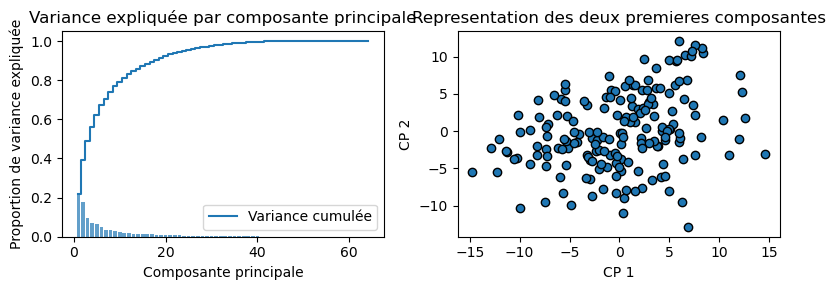


 ------ DIGIT =  1 -------------
Nombre de Composantes:  10
Variance Gardé:  0.9007985598137724


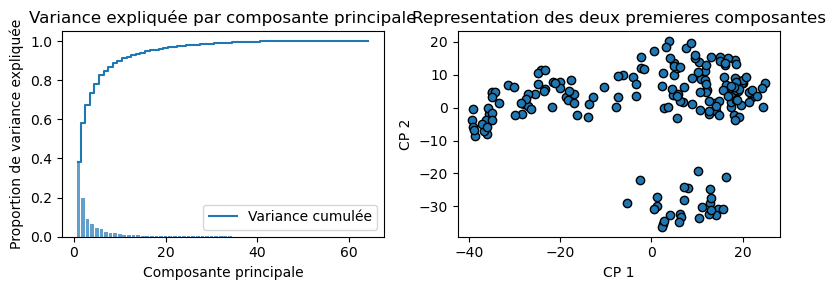


 ------ DIGIT =  2 -------------
Nombre de Composantes:  14
Variance Gardé:  0.9056855834672576


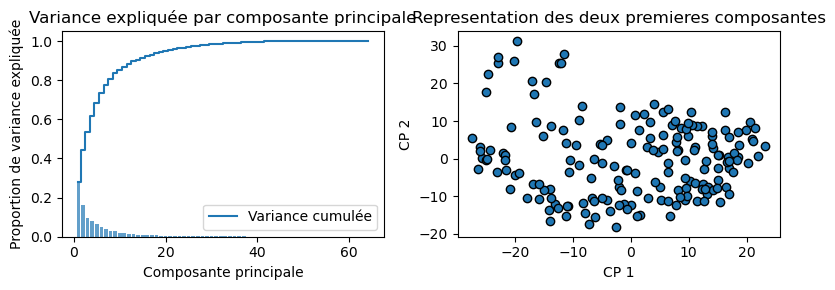


 ------ DIGIT =  3 -------------
Nombre de Composantes:  17
Variance Gardé:  0.9046357607059136


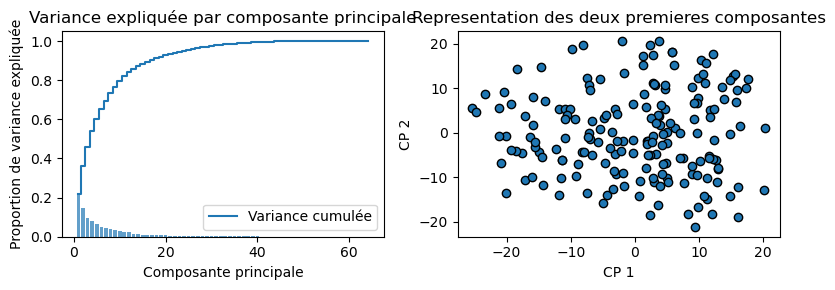


 ------ DIGIT =  4 -------------
Nombre de Composantes:  15
Variance Gardé:  0.9095200400114547


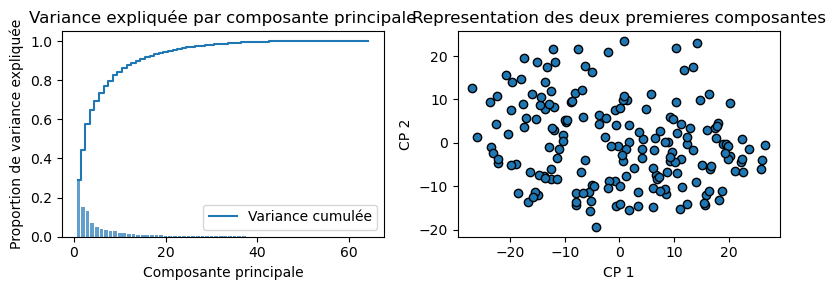


 ------ DIGIT =  5 -------------
Nombre de Composantes:  16
Variance Gardé:  0.9069799903713452


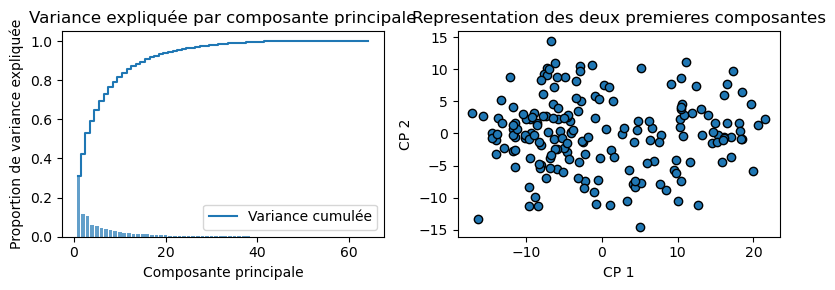


 ------ DIGIT =  6 -------------
Nombre de Composantes:  14
Variance Gardé:  0.9007624973822952


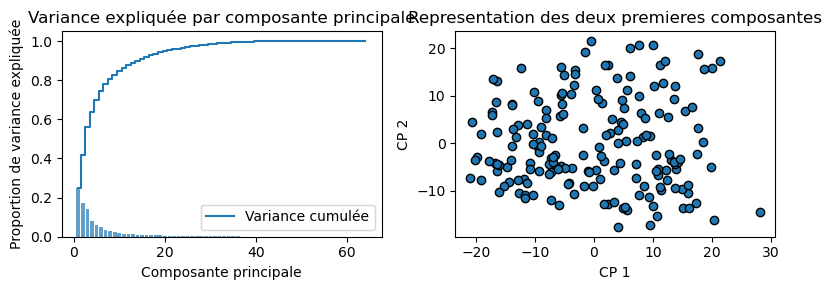


 ------ DIGIT =  7 -------------
Nombre de Composantes:  15
Variance Gardé:  0.9030913155947536


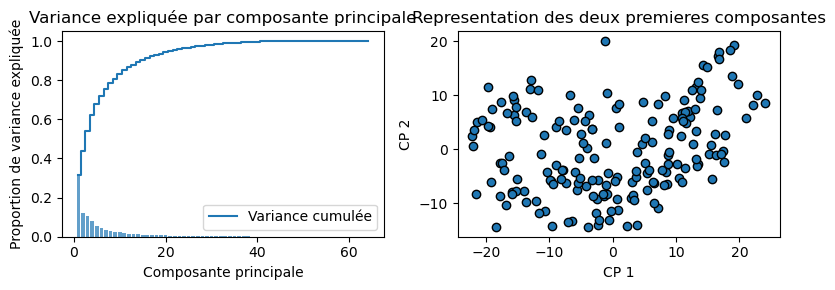


 ------ DIGIT =  8 -------------
Nombre de Composantes:  18
Variance Gardé:  0.9023303278478599


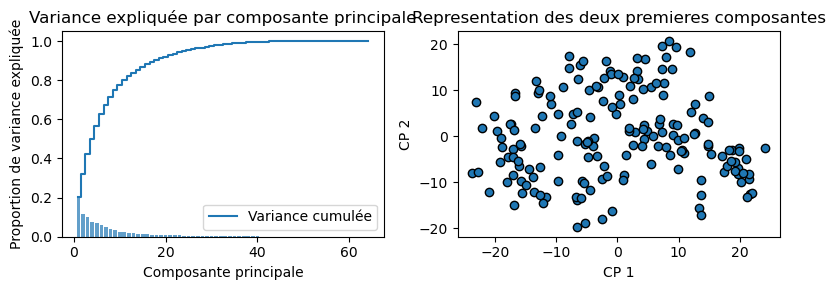


 ------ DIGIT =  9 -------------
Nombre de Composantes:  17
Variance Gardé:  0.9054525007103374


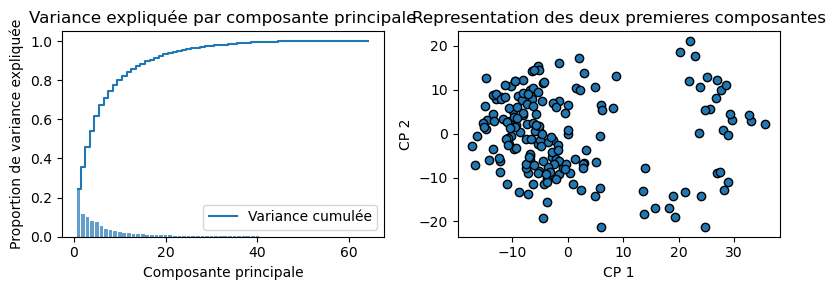

Ordre décroissant de Composantes Principales:  [0. 8. 3. 9. 5. 4. 7. 2. 6. 1.]
Nombre de Composantes Principales:  [18. 18. 17. 17. 16. 15. 15. 14. 14. 10.]


In [47]:
if __name__ == '__main__':    

    #######################################################################
    ########### DATASET IRIS ############################
    digits = datasets.load_digits(n_class=10)
    X = digits.data
    y = digits.target

    #######################################################################
    ########### ACP simple ########### 
    Y, VarExp, Vectp = myACP(digits.data)    
    
    Order1 = np.zeros(np.shape(np.unique(y))[0])
    Order2 = np.zeros(np.shape(np.unique(y))[0])
    
    for i in np.unique(y):
        print("\n ------ DIGIT = ", i, "-------------")
        newDigits = X[y==i]
        newLabels = y[y==i]
        Y, VarExp, Vectp = myACP(newDigits)  
        countcomp, VarGarde = CountComp(Y, VarExp)
        Order1[i] = i
        Order2[i] = countcomp
    
    Order2, Order1 = TriVP(Order2, Order1)
 
    print("Ordre décroissant de Composantes Principales: ",Order1)
    print("Nombre de Composantes Principales: ",Order2)

### Conclusion:

We are able to see that the number of necessary components to reach a high variance change a lot from class to class in the same dataset. This can be related to the complexity of the representation of each number. For exemple, the number 1, who is often represented by a single straight line, has a more consistent than the other, that explains the gap between 10 components and 14 components. The 0 and 8 in the other hand, can vary a lot depending on each circle size and shape.

It is also important to mention that the representation of the dataset in only two dimentions is not suitable for the dataset digits. Many of the classes are widely distributed over the new space, as the graphs in the right indicates. Therefore, a classification strategy would still have diffiulties to distinguish all of the classes.  

In [48]:
def approximation( X, Vect_P, n_p):
    # calcul de la moyenne
    m , d = X.shape

    moy = np.sum(X,0)/m
    XC = X - moy

    X_app = np.zeros((m,d))
    for i in range(m):
        # ajout des n valeurs projetées
        projections = (XC[i,:]@Vect_P[:,0:n_p]).reshape((1,n_p))
        projections = np.repeat(projections,d,axis =0)
        X_app[i,:]= moy + np.sum(projections*Vect_P[:,0:n_p],axis=1)
        
    return X_app


 ------ DIGIT =  0 -------------
Sommes des Produits Scalaires:  2.01574867908505e-15

 All Components | 5 Components | Difference


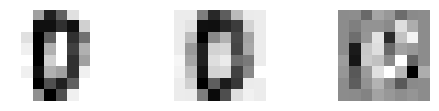


 ------ DIGIT =  1 -------------
Sommes des Produits Scalaires:  2.832716700096327e-14

 All Components | 5 Components | Difference


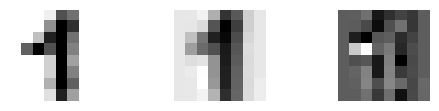


 ------ DIGIT =  2 -------------
Sommes des Produits Scalaires:  5.3953369549830654e-14

 All Components | 5 Components | Difference


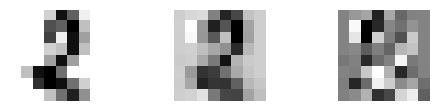


 ------ DIGIT =  3 -------------
Sommes des Produits Scalaires:  1.2194412146726563e-13

 All Components | 5 Components | Difference


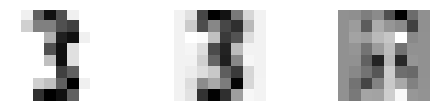


 ------ DIGIT =  4 -------------
Sommes des Produits Scalaires:  1.4661882818955974e-14

 All Components | 5 Components | Difference


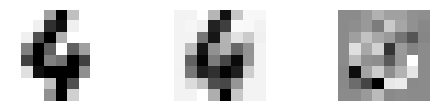


 ------ DIGIT =  5 -------------
Sommes des Produits Scalaires:  2.1573021147247573e-14

 All Components | 5 Components | Difference


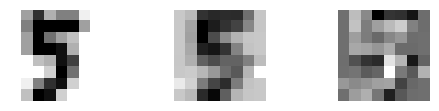


 ------ DIGIT =  6 -------------
Sommes des Produits Scalaires:  -2.0886070650760757e-15

 All Components | 5 Components | Difference


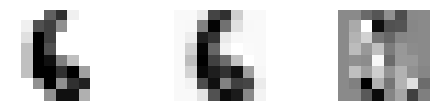


 ------ DIGIT =  7 -------------
Sommes des Produits Scalaires:  -1.0949574580365606e-14

 All Components | 5 Components | Difference


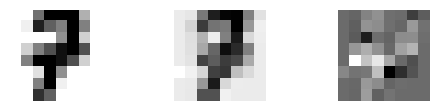


 ------ DIGIT =  8 -------------
Sommes des Produits Scalaires:  7.348288644237755e-15

 All Components | 5 Components | Difference


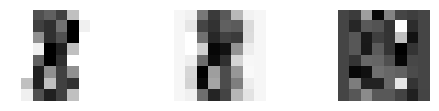


 ------ DIGIT =  9 -------------
Sommes des Produits Scalaires:  5.2378240633643713e-14

 All Components | 5 Components | Difference


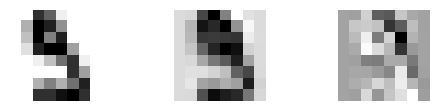

In [49]:
for i in np.unique(y):
    print("\n ------ DIGIT = ", i, "-------------")
    newDigits = X[y==i]
    newLabels = y[y==i]
    Y, VarExp, Vectp = myACP(newDigits)  
    X_app = approximation( newDigits, Vectp,5)
    
    tot=0
    for i in range(5):
        for j in range(5):
            if i==j:
                prod = 0
            else:
                prod = np.sum(Vectp[i]@Vectp[j])
            tot = tot+prod
    
    
    print("Sommes des Produits Scalaires: ",tot)

    # plt.figure(figsize=(2, 2))
    # plt.imshow(1 - X_app[i].reshape((8,8)), cmap='gray')
    # plt.axis('off')
    # plt.show()
    print("\n All Components | 5 Components | Difference")
    fig = plt.figure(2, figsize=(6,14))   
    plt.subplot(10,3,3*i+1)
    plt.imshow(1 - newDigits[i].reshape((8,8)), cmap='gray')
    plt.axis('off')
    plt.subplot(10,3,3*i+2)
    plt.imshow(1-X_app[i].reshape((8,8)),cmap='gray')
    plt.axis('off')
    plt.subplot(10,3,3*i+3)
    plt.imshow((newDigits[i]-X_app[i]).reshape((8,8)),cmap='gray')
    plt.axis('off')
    plt.show()

### Conclusion:
First, we can see all of the classes have ortogonal principal components, since all of the projections (produit scalaire) of one into another are zero (we can consider such small numbers as zero). 

When we compare the images constructed using all of the principal components and those using only 5 of the components, we can see they are very alike, this proves that the five first components garantee a considerable variance. But when we see the difference between the two images, some classes present a distinguable error, that is, we are able to see the contour of the number itself. This indicates that the variance kept by the 5 components are not representing well the data in this new space.